<a href="https://colab.research.google.com/github/kumar0406/MachineLearning_Projects/blob/master/XgB%26CatB_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Label encoding with missing value with new category

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [3]:
train = pd.read_csv("/content/drive/MyDrive/AV_insurance_job-a-thon/train_Df64byy.csv")
test = pd.read_csv("/content/drive/MyDrive/AV_insurance_job-a-thon/test_YCcRUnU.csv")

In [4]:
train.head(3)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1


In [5]:
## Convert everything to intiger before feeding to classifier, go for label encoding

In [6]:
## Fill up missing values
train['Health Indicator'] = train['Health Indicator'].fillna('X10')
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].fillna('15.0')
train['Holding_Policy_Type'] = train['Holding_Policy_Type'].fillna('6.0')

In [7]:
train['Holding_Policy_Type'] = train['Holding_Policy_Type'].astype('str')

In [8]:
train['Holding_Policy_Type'].value_counts().index

Index(['6.0', '3.0', '1.0', '2.0', '4.0'], dtype='object')

In [9]:
train['Reco_Policy_Cat'] = train['Reco_Policy_Cat'].astype('str')

In [10]:
from sklearn import preprocessing

In [11]:
col_for_LE = ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat']

In [12]:
le = preprocessing.LabelEncoder()

In [13]:
## try to fit label encoder with missing value
#train['Health Indicator_le'] = le.fit_transform(train['Health Indicator'])

In [14]:
train_le = train.copy()

for i in col_for_LE:
  le.fit(train_le[[i]])

  train_le[i] = le.transform(train_le[[i]])



In [15]:
train_le.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,22,3213,1,0,36,36,0,0,5,2,14,11628.0,0
1,2,31,1117,0,1,75,22,0,2,7,4,14,30510.0,0
2,3,31,3732,0,0,32,32,0,1,0,0,10,7450.0,1
3,4,16,4378,0,1,52,48,0,0,5,2,10,17780.0,0
4,5,34,2190,1,0,44,44,0,2,9,0,7,10404.0,0


In [16]:
from xgboost import XGBClassifier

In [17]:
## Split train test

X = train_le.drop(['ID', 'Response'], axis=1)
y = train_le['Response']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
model = XGBClassifier()

In [20]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
predictions = model.predict(X_test)

In [22]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
from sklearn.metrics import accuracy_score


In [24]:
accuracy_score(predictions, y_test)

0.754208974778906

In [25]:
!pip install catboost

     |████████████████████████████████| 65.7MB 62kB/s 


In [26]:
from catboost import CatBoostClassifier

In [27]:
cat_model = CatBoostClassifier()

In [28]:
cat_model.fit(X_train, y_train)

Learning rate set to 0.047369
0:	learn: 0.6776522	total: 66.8ms	remaining: 1m 6s
1:	learn: 0.6638910	total: 83.4ms	remaining: 41.6s
2:	learn: 0.6524007	total: 99ms	remaining: 32.9s
3:	learn: 0.6420347	total: 116ms	remaining: 28.9s
4:	learn: 0.6316008	total: 133ms	remaining: 26.5s
5:	learn: 0.6225135	total: 150ms	remaining: 24.8s
6:	learn: 0.6130095	total: 166ms	remaining: 23.6s
7:	learn: 0.6057532	total: 184ms	remaining: 22.9s
8:	learn: 0.5982470	total: 205ms	remaining: 22.6s
9:	learn: 0.5928126	total: 220ms	remaining: 21.8s
10:	learn: 0.5879029	total: 237ms	remaining: 21.3s
11:	learn: 0.5833914	total: 255ms	remaining: 21s
12:	learn: 0.5789047	total: 272ms	remaining: 20.6s
13:	learn: 0.5752667	total: 289ms	remaining: 20.3s
14:	learn: 0.5719367	total: 306ms	remaining: 20.1s
15:	learn: 0.5689882	total: 323ms	remaining: 19.8s
16:	learn: 0.5660860	total: 340ms	remaining: 19.6s
17:	learn: 0.5632666	total: 355ms	remaining: 19.4s
18:	learn: 0.5611052	total: 372ms	remaining: 19.2s
19:	learn: 0

In [29]:
cat_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
accuracy_score(cat_model.predict(X_test), y_test)

0.7545365214543073

In [32]:
## XGBOOST - other parameters
# 1. k-fold cross validations

In [33]:
X_train.shape

(35617, 12)

In [36]:
from sklearn.model_selection import KFold, cross_val_score

In [43]:
kfold = KFold(n_splits=12, shuffle=True, random_state=0)

In [44]:
model_3 = XGBClassifier()

In [45]:
results = cross_val_score(model_3, X_train, y_train, cv=kfold)

In [46]:
results

array([0.76187268, 0.768531  , 0.75640162, 0.77190027, 0.76516173,
       0.75909704, 0.74595687, 0.75269542, 0.77122642, 0.76549865,
       0.7722372 , 0.75876011])

In [47]:
results.mean()*100

76.2444915973596

In [48]:
results.std()*100

0.7877696554116141

In [49]:
## Lets check with stratified cross_val

In [50]:
from sklearn.model_selection import StratifiedKFold

In [51]:
Sk_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [52]:
results_stratified = cross_val_score(model_3, X_train, y_train, cv=Sk_fold )

In [53]:
results_stratified.mean()

0.7624449298746276

In [56]:
results_stratified.std(), results.std()

(0.00034359109439796267, 0.007877696554116142)

In [54]:
## Slightly better than k-fold

In [57]:
## Plot a tree of xgboost

In [58]:
from xgboost import plot_tree, plot_importance

In [73]:
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 8,5

<Figure size 576x576 with 0 Axes>

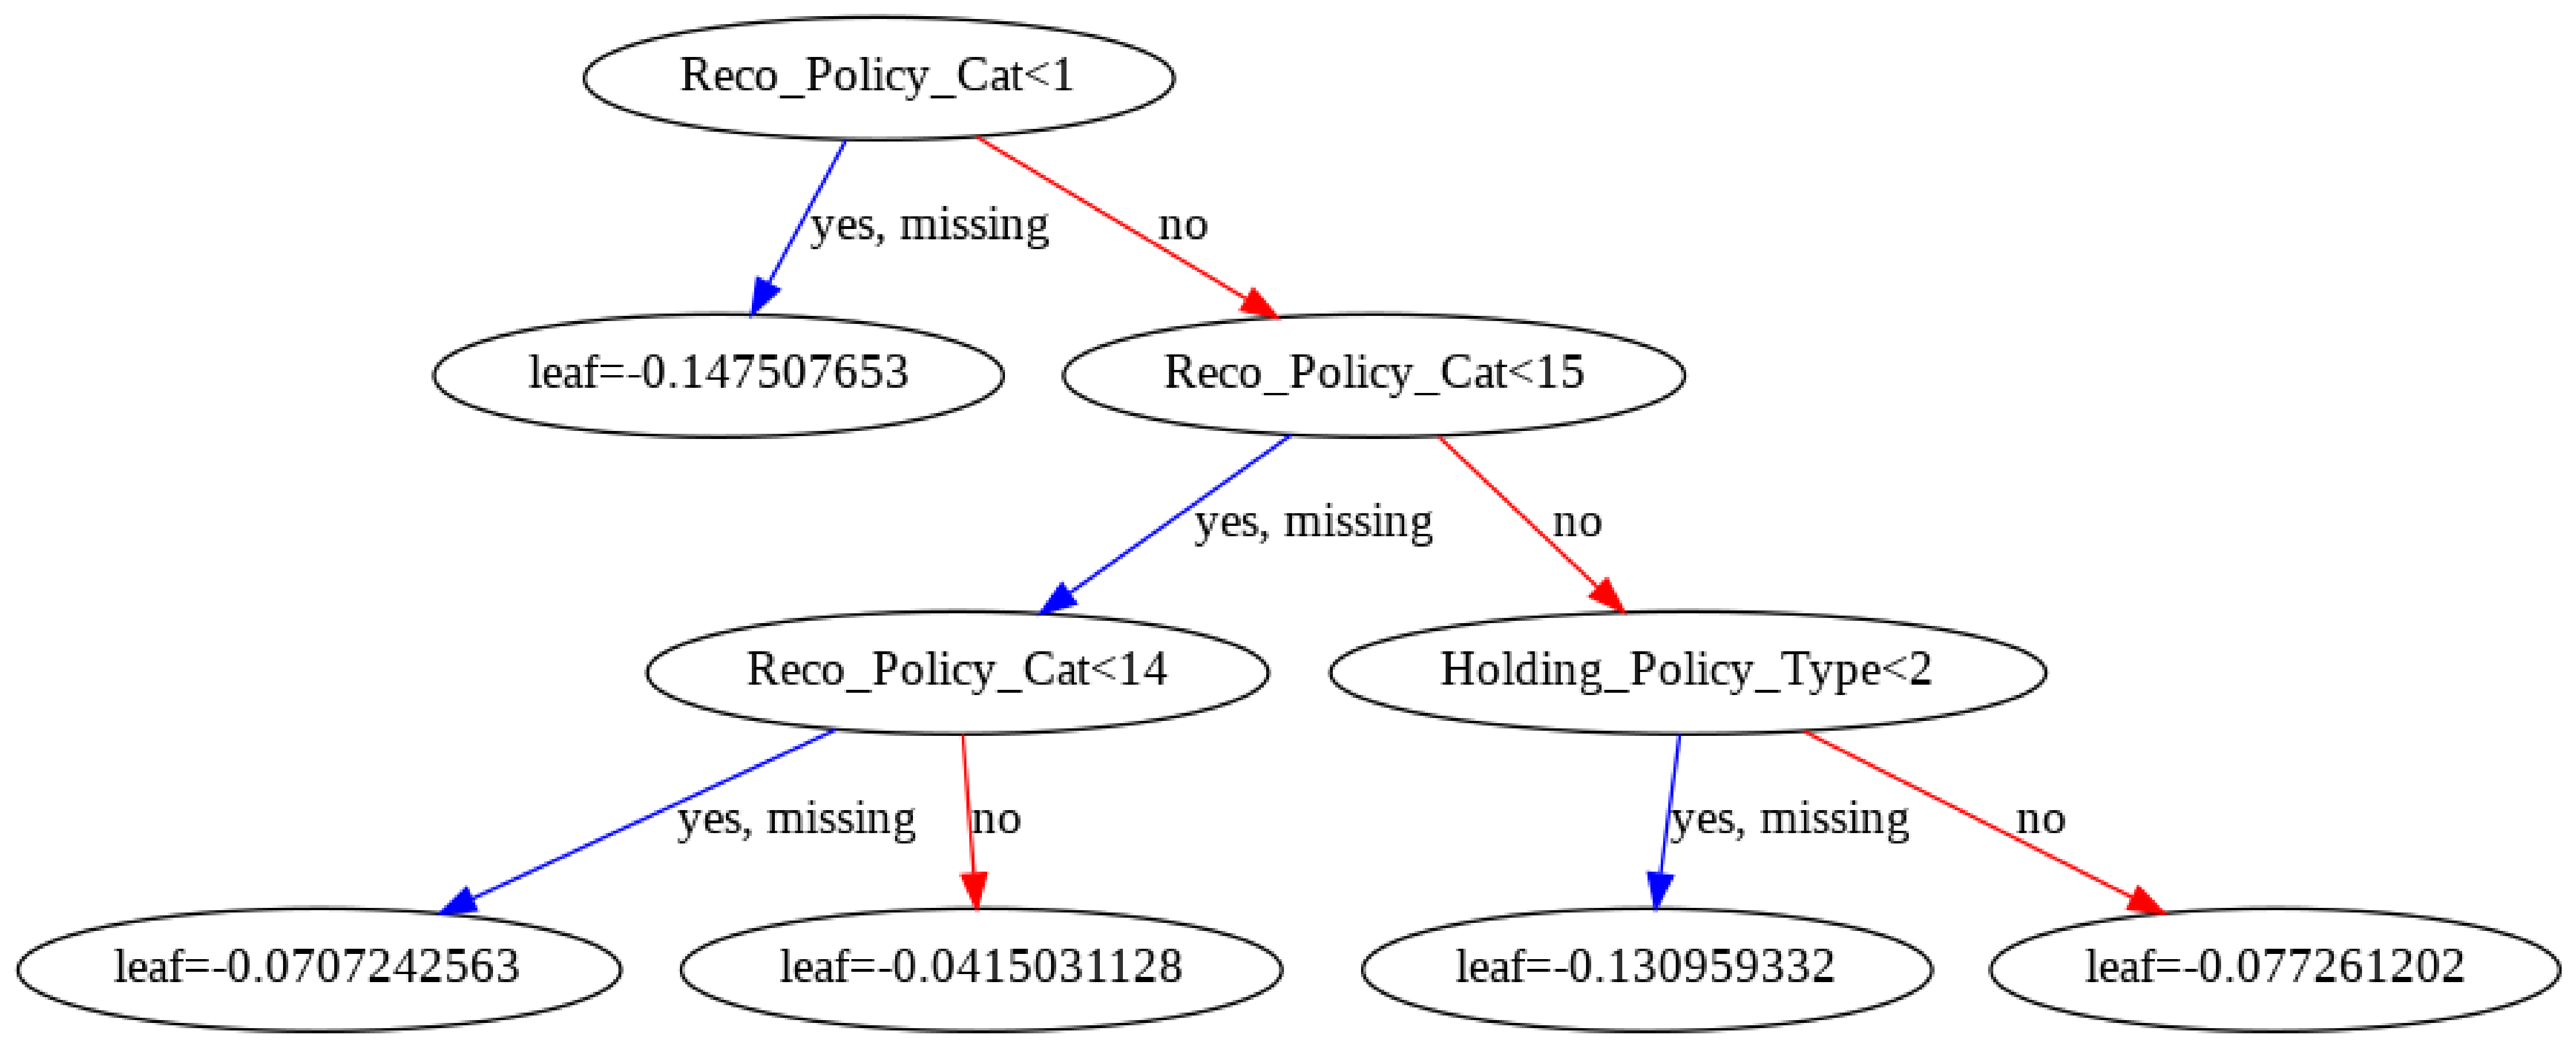

In [67]:
model_3.fit(X_train, y_train)
plt.figure(figsize=(8,8))
plot_tree(model_3, num_trees=4)
plt.show()

In [68]:
## Feature importance and feature selection

In [ ]:
from xgboost import featu

In [69]:
model_3.feature_importances_

array([0.10500317, 0.07491218, 0.14580756, 0.        , 0.04453938,
       0.03167551, 0.        , 0.0139372 , 0.05290623, 0.19765475,
       0.28445646, 0.04910757], dtype=float32)

<BarContainer object of 12 artists>

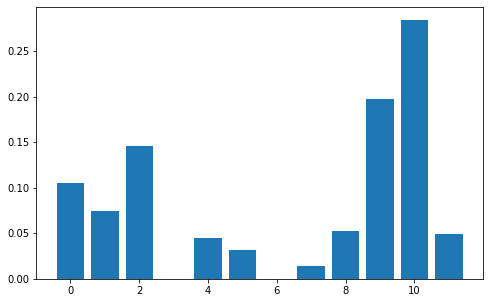

In [74]:
plt.bar(range(len(model_3.feature_importances_)),  model_3.feature_importances_)

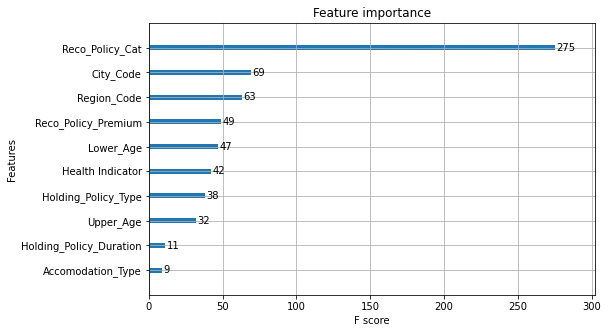

In [75]:
plot_importance(model_3)

In [76]:
## feature selection

In [77]:
from sklearn.feature_selection import SelectFromModel

In [83]:
threshold = np.sort(model_3.feature_importances_)

In [100]:
for thresh in threshold:
  selection = SelectFromModel(model_3, threshold=thresh, prefit=True)
  select_X_train = selection.transform(X_train)
  #print(select_X_train)
  selection_model = XGBClassifier()
  selection_model.fit(select_X_train, y_train)

  select_X_test = selection.transform(X_test)
  predictions = selection_model.predict(select_X_test)
  accuracy = accuracy_score(y_test, predictions)

  print(thresh, select_X_train.shape, accuracy*100)


0.0 (35617, 12) 75.4208974778906
0.0 (35617, 12) 75.4208974778906
0.013937202 (35617, 10) 75.4208974778906
0.031675506 (35617, 9) 75.40779561087454
0.044539385 (35617, 8) 75.40779561087454
0.049107566 (35617, 7) 75.41434654438257
0.052906234 (35617, 6) 75.40124467736653
0.07491218 (35617, 5) 75.40124467736653
0.10500317 (35617, 4) 75.4208974778906
0.14580756 (35617, 3) 75.4208974778906
0.19765475 (35617, 2) 75.4208974778906
0.28445646 (35617, 1) 75.4208974778906


In [101]:
threshold

array([0.        , 0.        , 0.0139372 , 0.03167551, 0.04453938,
       0.04910757, 0.05290623, 0.07491218, 0.10500317, 0.14580756,
       0.19765475, 0.28445646], dtype=float32)

In [102]:
model_s = XGBClassifier()

In [108]:
model_s.fit(X_train.drop(['Reco_Policy_Cat'], axis=1), y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [110]:
pred_s = model_s.predict(X_test.drop(['Reco_Policy_Cat'], axis=1))

In [111]:
acc_s = accuracy_score(y_test, pred_s)

In [112]:
acc_s

0.7540124467736653

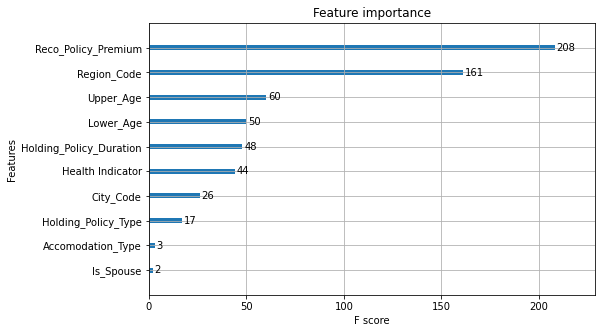

In [113]:
plot_importance(model_s)

In [114]:
model_3.feature_importances_

array([0.10500317, 0.07491218, 0.14580756, 0.        , 0.04453938,
       0.03167551, 0.        , 0.0139372 , 0.05290623, 0.19765475,
       0.28445646, 0.04910757], dtype=float32)

In [115]:
## Early stopping

In [116]:
## Use of eval set

In [117]:
eval_set= [(X_test, y_test)]

In [119]:
model_3.fit(X_train, y_train, eval_set=eval_set, verbose=True, eval_metric='error')

[0]	validation_0-error:0.245791
[1]	validation_0-error:0.245791
[2]	validation_0-error:0.245791
[3]	validation_0-error:0.245791
[4]	validation_0-error:0.245791
[5]	validation_0-error:0.245791
[6]	validation_0-error:0.245791
[7]	validation_0-error:0.245791
[8]	validation_0-error:0.245791
[9]	validation_0-error:0.245791
[10]	validation_0-error:0.245791
[11]	validation_0-error:0.245791
[12]	validation_0-error:0.245791
[13]	validation_0-error:0.245791
[14]	validation_0-error:0.245791
[15]	validation_0-error:0.245791
[16]	validation_0-error:0.245791
[17]	validation_0-error:0.245791
[18]	validation_0-error:0.245791
[19]	validation_0-error:0.245791
[20]	validation_0-error:0.245791
[21]	validation_0-error:0.245791
[22]	validation_0-error:0.245791
[23]	validation_0-error:0.245791
[24]	validation_0-error:0.245791
[25]	validation_0-error:0.245791
[26]	validation_0-error:0.245791
[27]	validation_0-error:0.245791
[28]	validation_0-error:0.245791
[29]	validation_0-error:0.245791
[30]	validation_0-er

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [120]:
prediction = model_3.predict(X_test)

In [121]:
accuracy_score(y_test, prediction)

0.754208974778906

In [122]:
## Evaluete XG Boost with learning curve

In [123]:
## Evaluate on both traning and test set

In [139]:
eval_set_both = [(X_train, y_train), (X_test, y_test)]
model_3.fit(X_train, y_train, eval_set=eval_set_both, eval_metric=['error', 'logloss'], verbose=True)

[0]	validation_0-error:0.237443	validation_0-logloss:0.665407	validation_1-error:0.245791	validation_1-logloss:0.666408
[1]	validation_0-error:0.237443	validation_0-logloss:0.642996	validation_1-error:0.245791	validation_1-logloss:0.644683
[2]	validation_0-error:0.237443	validation_0-logloss:0.62439	validation_1-error:0.245791	validation_1-logloss:0.626699
[3]	validation_0-error:0.237443	validation_0-logloss:0.609141	validation_1-error:0.245791	validation_1-logloss:0.611964
[4]	validation_0-error:0.237443	validation_0-logloss:0.596492	validation_1-error:0.245791	validation_1-logloss:0.599933
[5]	validation_0-error:0.237443	validation_0-logloss:0.585964	validation_1-error:0.245791	validation_1-logloss:0.589819
[6]	validation_0-error:0.237443	validation_0-logloss:0.57723	validation_1-error:0.245791	validation_1-logloss:0.581614
[7]	validation_0-error:0.237443	validation_0-logloss:0.569907	validation_1-error:0.245791	validation_1-logloss:0.574654
[8]	validation_0-error:0.237443	validation

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [141]:
model_3.evals_result()

{'validation_0': {'error': [0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237443,
   0.237359,
   0.237359,
   0.237359,
   0.237359,
   0.237359,
   0.237359,
   0.237359,
   0.237359,
   0.237359,
   0.237359,
   0.237359,


In [142]:
results = model_3.evals_result()

In [143]:
epochs = len(results['validation_0']['error'])

In [144]:
epochs

100

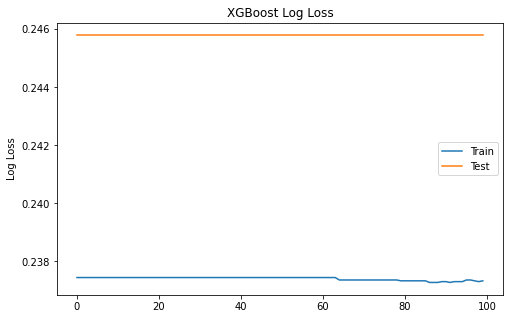

In [145]:
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
